<a href="https://colab.research.google.com/github/dolivag/Portfolio/blob/main/kNN_cast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Librerias para generar los datos del problema
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split


from math import sqrt  # Función para calcular la raíz cuadrada de una variable
import matplotlib.pyplot as plt # Libreria para dibujar gráficos

## Datos

Generamos un problema de clasificación de datos en el que hay 4 clases diferentes. 
El conjunto de datos consta de 400 muestras, nos quedamos el 75% (X\_train) para entrenar el modelo y el 25% (X\_test) restante nos servirá para evaluarlo.

Notad que cada muestra del conjunto de datos tiene dos dimensiones como se puede observar en el gráfico.


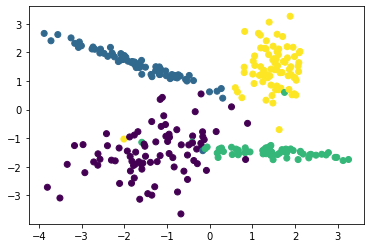

In [3]:
# Nota: Este código no se puede cambiar
X, y = make_classification(n_samples=400, n_features=2, n_informative=2, n_redundant=0,
                                     n_repeated=0, n_classes=4, n_clusters_per_class=1, class_sep=1.5, 
                                     random_state=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)


#Visualizamos los datos de entrenamiento
plt.scatter(X_train[:,0], X_train[:,1],c=y_train);


## Cálculos


In [4]:
import numpy as np

# Función distancia euclidea
def euclidean_distance(row1, row2):
	a=np.array(row1)
	b=np.array(row2)
	dist = np.linalg.norm(b-a)
	return dist
 

# Función para encontrar los vecinos más cercanos
def get_neighbors(train, labels, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append(dist)

	ordered_labels = [x for _,x in sorted(zip(distances, labels))]
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(ordered_labels[i])
	return neighbors

# Función para predecir la clase de un conjunto de datos:
# train: conjunto de entrenamiento, con el que compararemos. Matriz con número 
# de filas = número de elementos en el conjunto y 2 columnas.
#
# labels: etiquetas del conjunto de entrenamiento. Lista con número 
# de filas = número de elementos en el conjunto
#
# test: conjunto de evaluación.  Matriz con número 
# de filas = número de elementos en el conjunto y 2 columnas.
#
# num_neighbors: Vecinos a considerar
def predict_classification(train, labels, test, num_neighbors):
	predictions = list()
	for test_row in test: 
		neighbors = get_neighbors(train, labels, test_row, num_neighbors)
		prediction = max(set(neighbors), key=neighbors.count)
		predictions.append(prediction)
	return predictions

print(y_train)

[2 1 2 0 1 3 1 0 2 0 3 0 1 1 2 3 3 0 0 0 3 0 1 3 3 0 2 3 1 2 0 2 2 1 2 1 2
 0 3 3 3 3 2 3 0 1 3 3 0 2 1 1 2 3 0 1 0 1 2 0 0 1 1 3 1 3 3 0 3 3 3 3 2 2
 3 1 2 3 1 1 0 2 1 3 0 0 0 3 0 2 2 3 1 1 3 1 1 0 0 1 2 3 2 1 0 3 1 0 2 2 2
 2 2 3 2 0 3 0 2 2 3 0 2 1 0 0 0 1 2 1 0 2 1 1 0 2 1 0 0 3 3 1 0 2 0 1 3 1
 1 0 0 3 2 0 3 2 0 0 2 2 0 1 2 1 3 0 3 3 0 1 0 3 2 2 2 2 1 1 1 3 0 0 1 0 0
 0 2 0 0 2 1 2 3 2 1 3 0 0 0 1 2 1 1 0 1 0 2 2 1 3 3 2 2 0 2 3 3 1 3 1 3 3
 3 0 1 2 0 2 3 1 3 1 3 0 1 2 1 0 0 1 3 1 0 3 0 3 2 0 1 1 1 1 0 3 1 3 2 3 1
 0 2 1 0 0 1 2 3 3 0 3 2 3 2 0 3 3 0 2 3 0 1 3 0 0 1 2 2 3 3 0 1 3 2 1 2 3
 3 3 3 0]


## Clasificación

Usamos el 25% que hemos reservado para evaluar el modelo lo evaluamos con 3 vecinos y obtenemos la predicción.

In [13]:
from sklearn.metrics import confusion_matrix

# TODO: poner vuestro código aquí

y_true = y_test
y_pred=predict_classification(X_train,y_train,X_test,15)

confusion_matrix(y_true, y_pred)




array([[17,  0,  1,  0],
       [ 0, 27,  0,  1],
       [ 0,  0, 32,  0],
       [ 0,  0,  0, 22]])